In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree, model_selection, ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

In [4]:
data = pd.read_csv('./match_features.csv', index_col = 0)
data.columns

Index(['MP', 'FG_AVG', 'FGA_AVG', 'FG%_AVG', '2P_AVG', '2PA_AVG', '2P%_AVG',
       '3P_AVG', '3PA_AVG', '3P%_AVG', 'FT_AVG', 'FT%_AVG', 'PTS_AVG',
       'FG.1_AVG', 'FGA.1_AVG', 'FG%.1_AVG', '2P.1_AVG', '2PA.1_AVG',
       '2P%.1_AVG', '3P.1_AVG', '3PA.1_AVG', '3P%.1_AVG', 'FT.1_AVG',
       'FTA.1_AVG', 'FT%.1_AVG', 'PTS.1_AVG', 'FG_players_AVG',
       'FGA_players_AVG', 'FG%_players_AVG', '3P_players_AVG',
       '3PA_players_AVG', '3P%_players_AVG', 'FT_players_AVG',
       'FT%_players_AVG', 'ORB_players_AVG', 'DRB_players_AVG',
       'TRB_players_AVG', 'AST_players_AVG', 'STL_players_AVG',
       'BLK_players_AVG', 'TOV_players_AVG', 'PF_players_AVG',
       'PTS_players_AVG', '+/-_players_AVG', 'TS%_players_AVG',
       '3PAr_players_AVG', 'FTr_players_AVG', 'ORB%_players_AVG',
       'DRB%_players_AVG', 'TRB%_players_AVG', 'AST%_players_AVG',
       'STL%_players_AVG', 'BLK%_players_AVG', 'TOV%_players_AVG',
       'USG%_players_AVG', 'ORtg_players_AVG', 'DRtg_players_AVG',


In [5]:
data.head()

,MP,FG_AVG,FGA_AVG,FG%_AVG,2P_AVG,2PA_AVG,2P%_AVG,3P_AVG,3PA_AVG,3P%_AVG,...,STL%_players_AVG,BLK%_players_AVG,TOV%_players_AVG,USG%_players_AVG,ORtg_players_AVG,DRtg_players_AVG,BPM_players_AVG,A/T_AVG,FG_AVG_AVG,y
0,0,-1.4,2.6,-0.0302,0.4,5.4,-0.0426,-1.8,-2.8,-0.0316,...,0.221960,-0.546554,2.443134,0.623933,-5.701625,-2.037104,-1.159788,-0.315775,0.976896,1
1,0,-4.1,-14.2,0.0274,-1.7,-6.1,0.0344,-2.4,-8.1,0.0152,...,-0.168279,0.533393,1.842403,-0.002582,4.486208,-4.874819,-0.067360,-0.451256,-3.010764,0
2,0,2.4,2.0,0.0150,1.7,2.6,-0.0015,0.7,-0.6,0.0269,...,-0.227475,0.346944,0.757610,-0.010248,-0.189826,6.964840,-0.561669,-0.132743,0.644868,1
3,0,2.6,-1.2,0.0361,2.6,0.7,0.0498,0.0,-1.9,0.0190,...,0.189513,0.999818,1.693740,0.003797,1.964042,-1.389299,0.341002,-0.400132,1.348361,0
4,0,0.4,-0.5,0.0062,4.4,4.8,0.0378,-4.0,-5.3,-0.0557,...,0.503607,0.028347,0.556315,-0.212838,-9.751847,-13.232417,-0.539127,0.054787,-1.667778,1


In [6]:
data = data.dropna()

In [7]:
# one hot on Tm and Opp
# one_hot_tm = pd.get_dummies(data[["Tm"]])
# one_hot_opp = pd.get_dummies(data[["Opp"]])
# data_one_hot = data.join([one_hot_tm, one_hot_opp])

In [9]:
X_columns = [i for i in data.columns.tolist() if i not in ['y']]

# X_columns = X_columns + one_hot_tm.columns.tolist() + one_hot_opp.columns.tolist()

In [113]:
X = data[X_columns]
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [108]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((799, 60), (343, 60), (799,), (343,))

In [12]:
# X_train.head()

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
parameters = [
    {'criterion': ['gini', 'entropy'], 
     'splitter': ['best', 'random'], 
     'max_depth': [4, 5, 6],
     'min_samples_split': [2, 3, 4],
     'min_samples_leaf': [2, 3, 4]}]

clf = GridSearchCV(tree.DecisionTreeClassifier(), 
                   parameters, 
                   cv = model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2021))

clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2021, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [4, 5, 6], 'min_samples_leaf': [2, 3, 4],
                          'min_samples_split': [2, 3, 4],
                          'splitter': ['best', 'random']}])

In [51]:
print('best parameters: ', clf.best_params_)

best parameters:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 4, 'splitter': 'best'}


In [52]:
y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_pred)

print('Train accuracy', accuracy_train)
print('Test accuracy', accuracy_test)

Train accuracy 0.6659364731653888
Test accuracy 0.5938864628820961


# XGBoost

In [100]:
from xgboost import XGBClassifier

In [54]:
xgb_model = XGBClassifier(objective = "binary:logistic")

params = {
            'eta': np.arange(0.01, 0.2, 0.05),
            'min_child_weight': np.arange(1, 2, 0.5).tolist(),
            'gamma': [0, 1, 2],
            'subsample': np.arange(0.3, 0.6, 0.1).tolist(),
            'colsample_bytree': np.arange(0.1, 0.5, 0.1).tolist(),
            'max_depth': [4, 5, 6]
        }

skf = StratifiedKFold(n_splits=10, shuffle = True)
xgb = GridSearchCV(xgb_model, 
                    param_grid = params,  
                    n_jobs = -1, 
                    cv = skf.split(X_train, y_train),
                    refit = "accuracy_score")

xgb.fit(X_train, y_train)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x12050bcf0>,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, mono...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             n_jobs=-1,
             

In [172]:
print('best parameters: ', xgb.best_params_)

best parameters:  {'colsample_bytree': 0.30000000000000004, 'eta': 0.01, 'gamma': 2, 'max_depth': 4, 'min_child_weight': 1.5, 'subsample': 0.3}


In [56]:
y_train_pred = xgb.predict(X_train)
y_pred = xgb.predict(X_test)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_pred)

print('Train accuracy', accuracy_train)
print('Test accuracy', accuracy_test)

Train accuracy 0.7360350492880613
Test accuracy 0.6681222707423581


In [114]:
model = XGBClassifier(colsample_bytree = 0.3, eta=0.01, gamma=2, max_depth=4,
                      min_child_weight=1.5, subsample=0.3)

In [115]:
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

[0]	validation_0-error:0.38116	validation_0-logloss:0.69207	validation_1-error:0.46725	validation_1-logloss:0.69293
[1]	validation_0-error:0.36802	validation_0-logloss:0.69121	validation_1-error:0.48908	validation_1-logloss:0.69228
[2]	validation_0-error:0.36473	validation_0-logloss:0.69032	validation_1-error:0.43668	validation_1-logloss:0.69137
[3]	validation_0-error:0.35707	validation_0-logloss:0.68933	validation_1-error:0.37991	validation_1-logloss:0.69059
[4]	validation_0-error:0.34611	validation_0-logloss:0.68821	validation_1-error:0.37555	validation_1-logloss:0.69027
[5]	validation_0-error:0.34502	validation_0-logloss:0.68730	validation_1-error:0.42795	validation_1-logloss:0.68985
[6]	validation_0-error:0.33735	validation_0-logloss:0.68634	validation_1-error:0.40611	validation_1-logloss:0.68975
[7]	validation_0-error:0.32968	validation_0-logloss:0.68534	validation_1-error:0.40175	validation_1-logloss:0.68938
[8]	validation_0-error:0.32749	validation_0-logloss:0.68431	validation_1

[71]	validation_0-error:0.27492	validation_0-logloss:0.63765	validation_1-error:0.33625	validation_1-logloss:0.66305
[72]	validation_0-error:0.27054	validation_0-logloss:0.63695	validation_1-error:0.33625	validation_1-logloss:0.66335
[73]	validation_0-error:0.26506	validation_0-logloss:0.63635	validation_1-error:0.32751	validation_1-logloss:0.66279
[74]	validation_0-error:0.26506	validation_0-logloss:0.63547	validation_1-error:0.34498	validation_1-logloss:0.66250
[75]	validation_0-error:0.26177	validation_0-logloss:0.63485	validation_1-error:0.33625	validation_1-logloss:0.66219
[76]	validation_0-error:0.26944	validation_0-logloss:0.63399	validation_1-error:0.33625	validation_1-logloss:0.66164
[77]	validation_0-error:0.26725	validation_0-logloss:0.63343	validation_1-error:0.33625	validation_1-logloss:0.66172
[78]	validation_0-error:0.27163	validation_0-logloss:0.63305	validation_1-error:0.34061	validation_1-logloss:0.66100
[79]	validation_0-error:0.27382	validation_0-logloss:0.63230	val

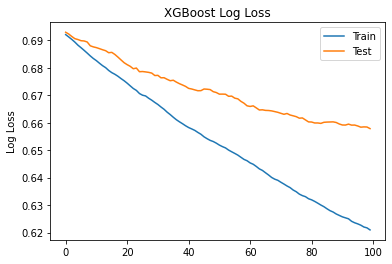

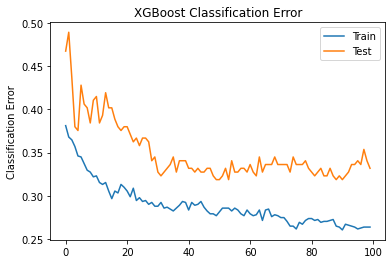

In [116]:
from matplotlib import pyplot

results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

https://blog.csdn.net/lujiandong1/article/details/52777168

In [117]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_pred)

print('Train accuracy', accuracy_train)
print('Test accuracy', accuracy_test)

Train accuracy 0.7360350492880613
Test accuracy 0.6681222707423581


# Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
forest = RandomForestClassifier(random_state = 1, n_estimators = 10, min_samples_split = 1)

params = {
            'n_estimators': [100, 300, 500, 1000],
            'max_depth': [5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5]
        }

rf = GridSearchCV(forest, params, cv = 3, verbose = 1, 
                      n_jobs = -1)
rf.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  1.6min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(min_samples_split=1,
                                              n_estimators=10, random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]},
             verbose=1)

In [173]:
print('best parameters: ', rf.best_params_)

best parameters:  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}


In [77]:
y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_pred)
print('Train accuracy', accuracy_train)
print('Test accuracy', accuracy_test)

Train accuracy 0.823658269441402
Test accuracy 0.6724890829694323


### tune max_depth to avoid overfitting

In [160]:
model = RandomForestClassifier(max_depth = 3, min_samples_leaf=2, 
                                min_samples_split=5, n_estimators=1000)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=1000)

In [161]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_pred)

print('Train accuracy', accuracy_train)
print('Test accuracy', accuracy_test)

Train accuracy 0.6955093099671413
Test accuracy 0.6855895196506551


In [ ]:
import lime
import lime.lime_tabular

In [ ]:
predict_fn_rf = lambda x: model.predict_proba(x).astype(float)
X = X_train.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = X_train.columns,class_names=['Will Die','Will Survive'],kernel_width=5)

# Adaboost

In [102]:
from sklearn.ensemble import AdaBoostClassifier

In [103]:
ada = AdaBoostClassifier()
params = {
            'n_estimators': [500, 1000, 2000],
            'learning_rate': [.001,0.01,.1]
        }
adb = GridSearchCV(estimator = ada, param_grid = params, scoring='accuracy', 
                   n_jobs=1, cv = 3)
adb.fit(X_train, y_train)
adb.best_params_

{'learning_rate': 0.001, 'n_estimators': 2000}

In [174]:
print('best parameters: ', adb.best_params_)

best parameters:  {'learning_rate': 0.001, 'n_estimators': 2000}


In [106]:
y_train_pred = adb.predict(X_train)
y_pred = adb.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_pred)
print('Train accuracy', accuracy_train)
print('Test accuracy', accuracy_test)

Train accuracy 0.6210295728368017
Test accuracy 0.6419213973799127


# lightGBM

In [167]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [ ]:
gbm = lgb.LGBMClassifier(objective = 'binary',
                         is_unbalance = True,
                         metric = 'binary_logloss,auc',
                         max_depth = 3,
                         num_leaves = 40,
                         learning_rate = 0.001,
                         feature_fraction = 0.6,
                         min_child_samples=21,
                         min_child_weight=0.002,
                         bagging_fraction = 0.8,
                         bagging_freq = 10,
                         reg_alpha = 0.001,
                         reg_lambda = 8,
                         cat_smooth = 20,
                         num_iterations =350,   
                        )

In [ ]:
gbm.fit(X_train, y_train)
y_train_pred = gbm.predict(X_train)
y_pred = gbm.predict(X_test)
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_pred)

print('Train accuracy', accuracy_train)
print('Test accuracy', accuracy_test)